# Рубежный контроль №2 (весна 2025 года)
**Студент:** Беспалова Виктория Андреевна

**Группа:** ИУ5-63Б

|Метод №1|Метод №2|Номер в списке группы|
|:---:|:---:|:---:|
|Дерево решений|Случайный лес|4|

**Задание**  
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). 

Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). 
- Какие метрики качества Вы использовали и почему? 
- Какие выводы Вы можете сделать о качестве построенных моделей? 

Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

## Загрузка датасета

Датасет: https://www.kaggle.com/carlolepelaars/toy-dataset

**Описание полей**:

| Признак | Описание                                                                                     |
|---------|----------------------------------------------------------------------------------------------|
| Number  | Индексный номер для каждой строки                                                          |
| City    | Местоположение человека (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin) |
| Gender  | Пол человека (Male or Female)                                                           |
| Age     | Возраст человека (в диапазоне от 25 до 65 лет).                                             |
| Income   | Годовой доход человека (в диапазоне от -674 до 177175).                                     |
| Illness | Является ли человек больным? (Yes или No)                                                  |

In [121]:
data = pd.read_csv("toy_dataset.csv")
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## Первичный анализ датасета

In [122]:
data.shape

(150000, 6)

In [123]:
data.isnull().sum() # --> нет пропусков в данных

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [124]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [125]:
data.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


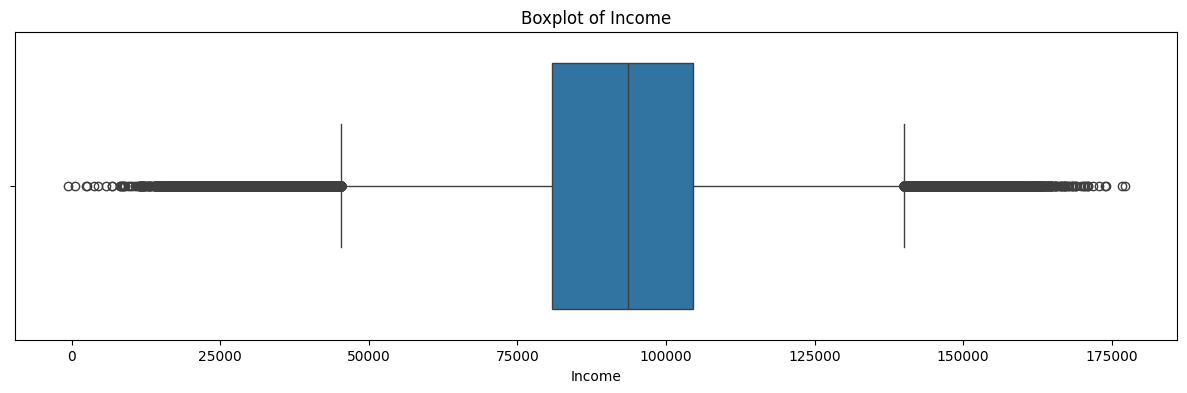

In [126]:
plt.figure(figsize=(15, 4))
sns.boxplot(x=data['Income'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()

In [127]:
data = data.drop('Number', axis=1)
data = data[data['Income'] >= 0]

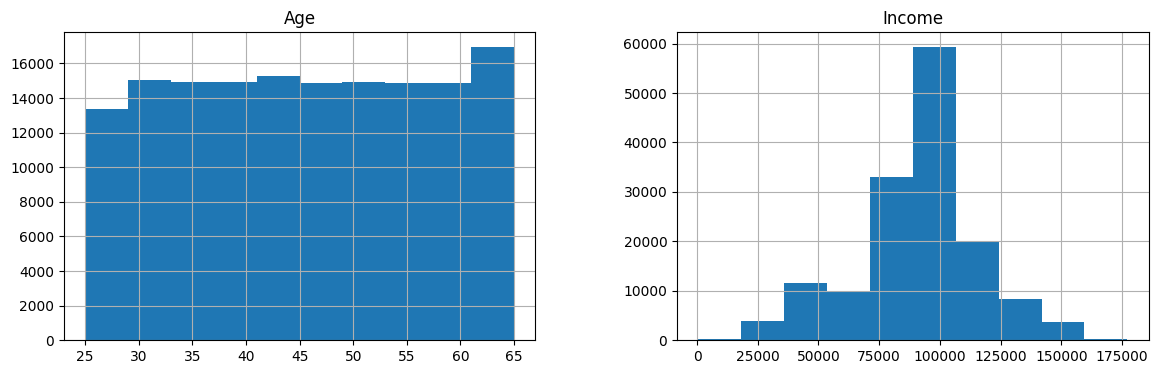

In [128]:
data.hist(bins=10,figsize=(14,4))
plt.show()

## Подготовка датасета

In [129]:
data.Illness.value_counts() # --> дисбаланс классов целевой переменной

Illness
No     137861
Yes     12138
Name: count, dtype: int64

### Кодирование признаков

In [130]:
# data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Illness'] = data['Illness'].map({'Yes': 1, 'No': 0})

In [131]:
# data = pd.get_dummies(data, ['City'], drop_first=True, dtype=int)
data = pd.get_dummies(data, ['City', 'Gender'], dtype=int)
data.head()


,Age,Income,Illness,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male
0,41,40367.0,0,0,0,1,0,0,0,0,0,0,1
1,54,45084.0,0,0,0,1,0,0,0,0,0,0,1
2,42,52483.0,0,0,0,1,0,0,0,0,0,0,1
3,40,40941.0,0,0,0,1,0,0,0,0,0,0,1
4,46,50289.0,0,0,0,1,0,0,0,0,0,0,1


<Axes: >

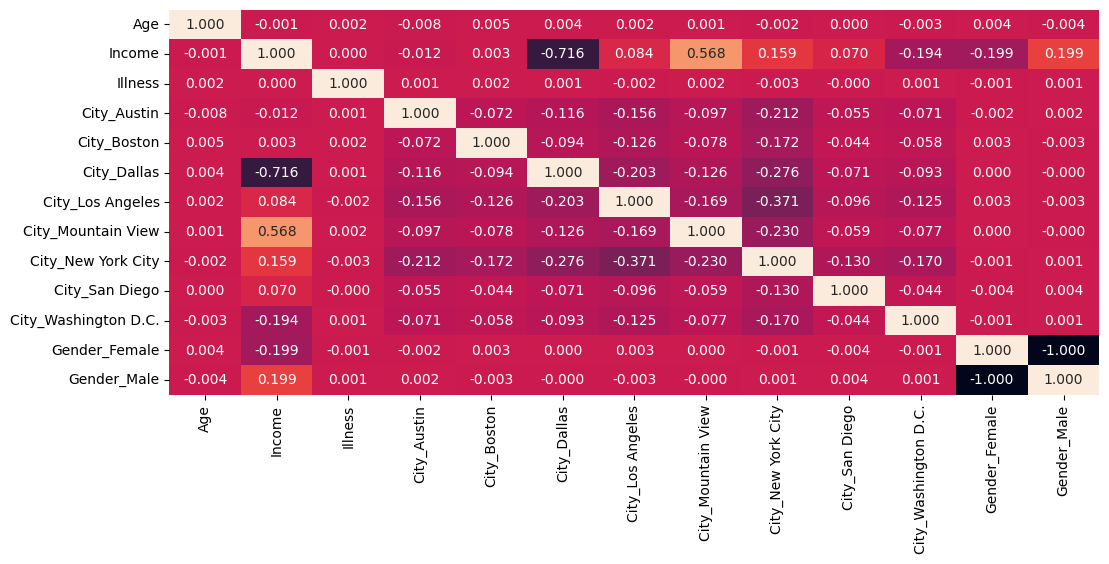

In [132]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.3f', cbar=False)

## Разделение выборки

In [133]:
X = data.drop('Illness', axis=1)
y = data['Illness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 10) 

In [134]:
# from imblearn.under_sampling import RandomUnderSampler

# undersampler = RandomUnderSampler(random_state=10)
# X_train, y_train = undersampler.fit_resample(X_train, y_train)

### Масшабирование данных
Масштабирование предполагает изменение диапазона измерения величины.

In [135]:
numerical_features = ['Age', 'Income']

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])

## Обучение моделей

### Дерево решений

In [136]:
parameters={'max_depth':range(3,30)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=10, class_weight='balanced'), parameters)
clf.fit(X_train, y_train)
dt_clf = clf.best_estimator_

print (clf.best_score_, clf.best_params_)

0.6071224182952067 {'max_depth': 28}


### Случайный лес

In [137]:
rf_clf = RandomForestClassifier(random_state=10,  class_weight='balanced', n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=10)

## Оценка качества моделей

### Основные метрики

**Accuracy**  
Процент (долю в диапазоне от 0 до 1) правильно определенных классов. 

**Precision**  
$precision = \frac{TP}{TP+FP}$  
Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

**Recall**  
$recall = \frac{TP}{TP+FN}$  
Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

**F1-мера**  
$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [138]:
# Дерево решений
y_pred_decision_tree = dt_clf.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_precision = precision_score(y_test, y_pred_decision_tree, average='weighted')
decision_tree_recall = recall_score(y_test, y_pred_decision_tree, average='weighted')
decision_tree_f1 = f1_score(y_test, y_pred_decision_tree, average='weighted')

In [139]:
# Случайный лес
y_pred_random_forest = rf_clf.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
random_forest_precision = precision_score(y_test, y_pred_random_forest, average='weighted')
random_forest_recall = recall_score(y_test, y_pred_random_forest, average='weighted')
random_forest_f1 = f1_score(y_test, y_pred_random_forest, average='weighted')

In [140]:
data = [
    ['accuracy', round(decision_tree_accuracy, 3), round(random_forest_accuracy, 3)],
    ['precision',round(decision_tree_precision, 3), round(random_forest_precision, 3)],
    ['recall', round(decision_tree_recall, 3), round(random_forest_recall, 3)],
    ['f1', round(decision_tree_f1, 3), round(random_forest_f1, 3)]
]

headers = ['Метрика \ модель', 'Дерево решений', 'Случайный лес']

print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------------+------------------+-----------------+
| Метрика \ модель   |   Дерево решений |   Случайный лес |
+====================+==================+=================+
| accuracy           |            0.536 |           0.867 |
+--------------------+------------------+-----------------+
| precision          |            0.852 |           0.85  |
+--------------------+------------------+-----------------+
| recall             |            0.536 |           0.867 |
+--------------------+------------------+-----------------+
| f1                 |            0.638 |           0.858 |
+--------------------+------------------+-----------------+


<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_906/1132356157.py:8: SyntaxWarning: invalid escape sequence '\ '
  headers = ['Метрика \ модель', 'Дерево решений', 'Случайный лес']


### Матрица ошибок

Text(0.5, 1.0, 'Случайный лес')

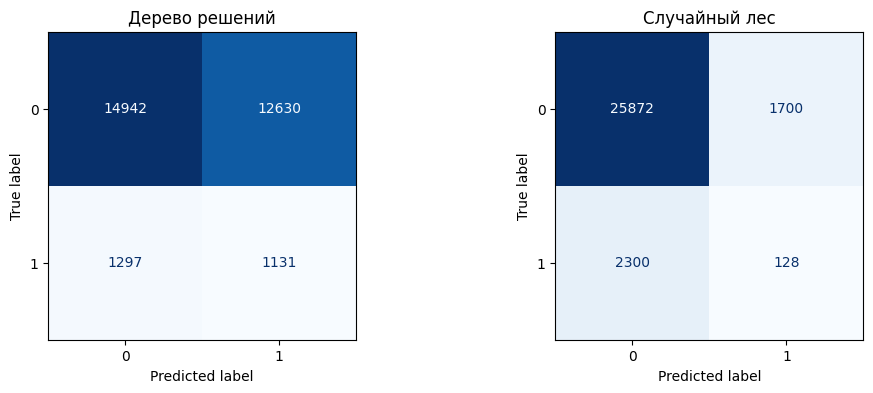

In [141]:
cm_dt = confusion_matrix(y_test, y_pred_decision_tree)
cm_rf = confusion_matrix(y_test, y_pred_random_forest)  

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp1.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
axes[0].set_title('Дерево решений')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp2.plot(ax=axes[1], cmap=plt.cm.Blues, colorbar=False)
axes[1].set_title('Случайный лес')

### ROC-кривая и ROC AUC
 Основана на вычислении следующих характеристик:
 
 $TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.
 
 $FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.
 
 В случае бинарной классификации матрица ошибок выглядит следующим образом:
 
 | Предсказанное/истинное значение | $y=1$ | $y=0$ |
 | --- | --- | --- |
 | $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
 | $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |
 
 $TPR$ содержит в знаменателе количество истинных 1.
 
 $FPR$ содержит в знаменателе количество истинных 0.

In [142]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

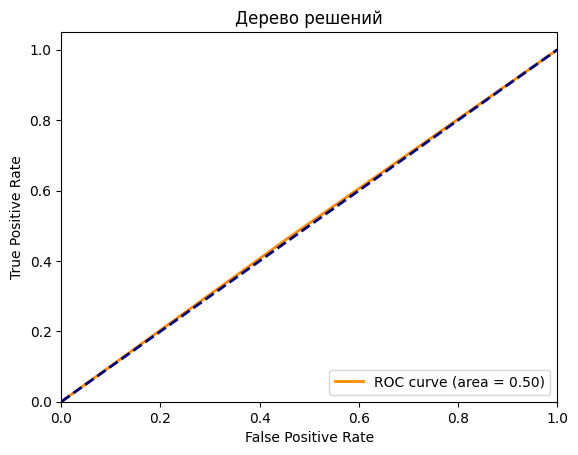

In [143]:
draw_roc_curve(y_test, y_pred_decision_tree, pos_label=1, average='micro', title="Дерево решений")

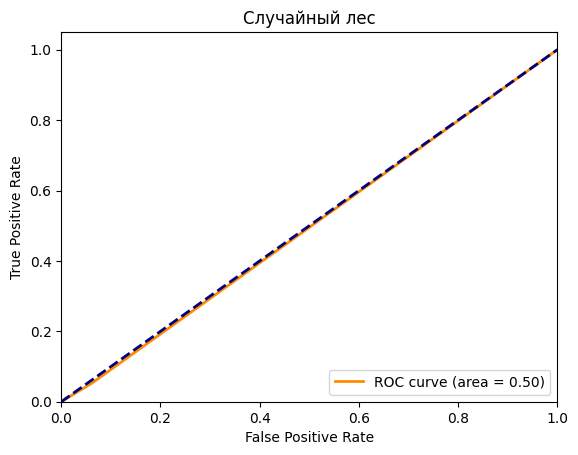

In [144]:
draw_roc_curve(y_test, y_pred_random_forest, pos_label=1, average='micro', title="Случайный лес")

## Выводы
Качество моделей получилось очень низким.

В работе для оценки моделей использовались метрики для оценки качества классификации: 
- accuracy, precision, recall, f1 
- матрица ошибок
- ROC-кривая

Ни дерево решений, ни случайный лес не могут предсказать заболевание человека. Возможно, это связано с дисбалансом классов целевого признака. 

In [ ]:
dt_predictions = dt_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)

dt_predictions_train = dt_clf.predict(X_train)
rf_predictions_train = rf_clf.predict(X_train)

def evaluate_model(y_true, y_pred, model_name="Model", model=None, X_test=None, is_train=False):
    """Вычисляет и выводит метрики качества для модели классификации."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Metrics for {model_name} ( {'Training' if is_train else 'Test'} ):")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

    # Попытка расчета ROC AUC (требует predict_proba)
    try:
        y_proba = model.predict_proba(X_test)[:, 1] if not is_train else model.predict_proba(X_train)[:, 1] # Вероятности для класса 1
        roc_auc = roc_auc_score(y_true, y_proba)
        print(f"  ROC AUC:   {roc_auc:.4f}")
    except AttributeError:
        print("  ROC AUC:   Not applicable (model doesn't have predict_proba)")
    except Exception as e:
        print(f"  ROC AUC:   Error calculating ROC AUC: {e}")
    print("-" * 30)


# Вызываем функцию оценки для обеих моделей
print("\nEvaluation on Test Data:\n")
evaluate_model(y_test, dt_predictions, "Decision Tree", dt_clf, X_test)
evaluate_model(y_test, rf_predictions, "Random Forest", rf_predictions, X_test)

print("\nEvaluation on Training Data:\n")
evaluate_model(y_train, dt_predictions_train, "Decision Tree", dt_clf, X_train, is_train=True)
evaluate_model(y_train, rf_predictions_train, "Random Forest", rf_predictions, X_train, is_train=True)

# Simple Overfitting Check
print("\nSimple Overfitting Check:")

dt_train_accuracy = accuracy_score(y_train, dt_predictions_train)
dt_test_accuracy = accuracy_score(y_test, dt_predictions)

rf_train_accuracy = accuracy_score(y_train, rf_predictions_train)
rf_test_accuracy = accuracy_score(y_test, rf_predictions)


print(f"Decision Tree - Training Accuracy: {dt_train_accuracy:.4f}, Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Random Forest - Training Accuracy: {rf_train_accuracy:.4f}, Test Accuracy: {rf_test_accuracy:.4f}")

overfitting_threshold = 0.1 # Example threshold (adjust as needed)

if (dt_train_accuracy - dt_test_accuracy) > overfitting_threshold:
    print("Decision Tree: Possible overfitting detected.")
else:
    print("Decision Tree: Overfitting not strongly indicated.")


if (rf_train_accuracy - rf_test_accuracy) > overfitting_threshold:
    print("Random Forest: Possible overfitting detected.")
else:
    print("Random Forest: Overfitting not strongly indicated.")




Evaluation on Test Data:

Metrics for Decision Tree ( Test ):
  Accuracy:  0.5358
  Precision: 0.0822
  Recall:    0.4658
  F1-score:  0.1397
  ROC AUC:   0.5038
------------------------------
Metrics for Random Forest ( Test ):
  Accuracy:  0.8667
  Precision: 0.0700
  Recall:    0.0527
  F1-score:  0.0602
  ROC AUC:   Not applicable (model doesn't have predict_proba)
------------------------------

Evaluation on Training Data:

Metrics for Decision Tree ( Training ):
  Accuracy:  0.5583
  Precision: 0.1091
  Recall:    0.6222
  F1-score:  0.1856
  ROC AUC:   0.6515
------------------------------
Metrics for Random Forest ( Training ):
  Accuracy:  0.9991
  Precision: 0.9916
  Recall:    0.9970
  F1-score:  0.9943
  ROC AUC:   Not applicable (model doesn't have predict_proba)
------------------------------

Simple Overfitting Check:
Decision Tree - Training Accuracy: 0.5583, Test Accuracy: 0.5358
Random Forest - Training Accuracy: 0.9991, Test Accuracy: 0.8667
Decision Tree: Overfitt

## Черновик

In [145]:
# numerical_features = ['Age', 'Income']

# scaler = StandardScaler()

# data[numerical_features] = scaler.fit_transform(data[numerical_features])
# data.head()